In [2]:
options(dplyr.summarise.inform = FALSE)
library(tidyverse)
library(data.table)
library(survival)

In [3]:
source(paste0(dirname(dirname(dirname(getwd()))),'/map.r'))
source(paste0(dirname(dirname(dirname(getwd()))),'/stats.r'))

#### 0 - Read in output data

In [25]:
go <- fread(paste0(UTIL_DIR, "go.csv")) %>% arrange(pval) %>% filter(lrt_pval != 1, !is.na(pval), se < 10)

In [ ]:
#### 

In [30]:
options(repr.plot.width = 10, repr.plot.height = 8)

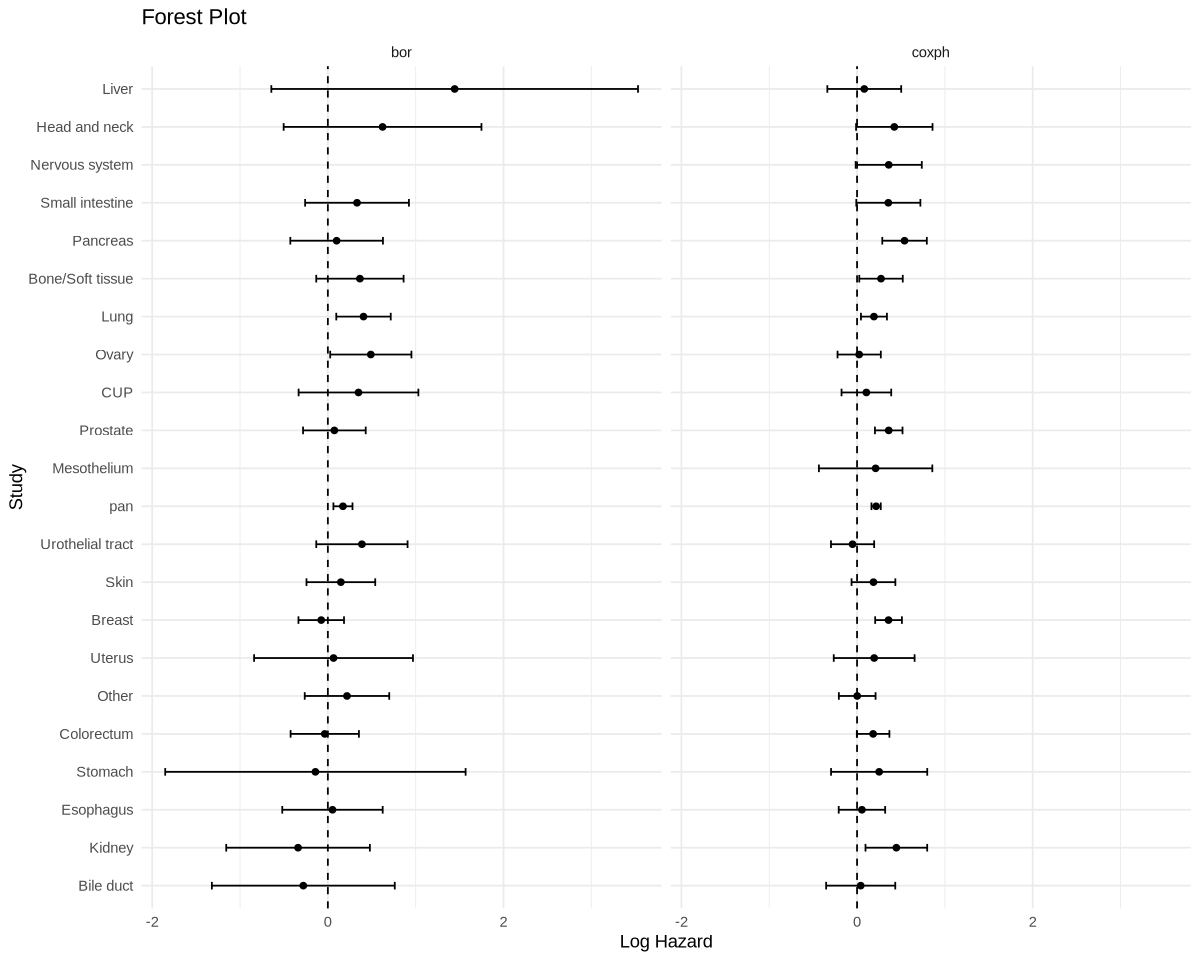

In [39]:
ggplot(go %>% filter( x == "rna_geneset_mp_Fibroblasts_Cell_cycle"), aes(x = est, y = reorder(cohort, est))) +
  geom_point() +
  geom_errorbarh(aes(xmin = est - 2*se, xmax = est + 2*se), height = 0.2) +
  labs(x = "Log Hazard", y = "Study", title = "Forest Plot") +
  theme_minimal() +
  facet_wrap( ~ model, ncol = 6) + 
  geom_vline(xintercept = 0, linetype = "dashed")

In [ ]:
#### 

In [37]:
head(go)

y,x,covariate,type,data,model,est,se,pval,lrt_pval,cohort,pval_by
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Y_bor,clin_hasSystemicPreTreatment,+ as.factor(location) + clin_age + clin_sex,clin,df,bor,-0.4848823,0.05186176,8.805171e-21,0,pan,5.277045e-15
"Surv(Y_os_days, Y_os_event)",rna_geneset_gene_set_prolif,+ as.factor(location) + clin_age + clin_sex,rna,df,coxph,0.2221143,0.02610916,1.782773e-17,0,pan,7.122918e-12
"Surv(Y_os_days, Y_os_event)",rna_geneset_HALLMARK_G2M_CHECKPOINT,+ as.factor(location) + clin_age + clin_sex,rna,df,coxph,0.2341350,0.02863895,2.948719e-16,0,pan,7.154795e-11
"Surv(Y_os_days, Y_os_event)",rna_geneset_mp_Fibroblasts_Cell_cycle,+ as.factor(location) + clin_age + clin_sex,rna,df,coxph,0.2169099,0.02653674,2.984586e-16,0,pan,7.154795e-11
"Surv(Y_os_days, Y_os_event)",rna_geneset_gene_set_prolif_rand1,+ as.factor(location) + clin_age + clin_sex,rna,df,coxph,0.2092240,0.02593943,7.271613e-16,0,pan,1.452655e-10
"Surv(Y_os_days, Y_os_event)",rna_geneset_mp_Epithelial_Cell_cycle,+ as.factor(location) + clin_age + clin_sex,rna,df,coxph,0.2108855,0.02659917,2.222129e-15,0,pan,3.804996e-10
